In [1]:
# import pycaret regression and init setup
from pycaret.regression import *
import pandas as pd

In [2]:
# 데이터 로드
file_path = r"C:\Users\dongj\OneDrive\바탕 화면\심화프로젝트\전처리파일1.csv"
data = pd.read_csv(file_path)

In [3]:
data.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,sales_total,discount_total,profit_total,profit_rate,Month
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,...,"Linden 10"" Round Wall Clock, Black",48.896,4.0,0.2,8.5568,195.584,0.8,34.2272,0.1750,1
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,...,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11.0,0.0,199.2606,5218.730,0.0,2191.8666,0.4200,1
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,...,Wilson Jones Easy Flow II Sheet Lifters,3.600,2.0,0.0,1.7280,7.200,0.0,3.4560,0.4800,1
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,SAFCO Boltless Steel Shelving,454.560,5.0,0.2,-107.9580,2272.800,1.0,-539.7900,-0.2375,1
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,...,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5.0,0.6,-187.3815,707.100,3.0,-936.9075,-1.3250,1


In [4]:
data_tm = data.drop(['sales_total','discount_total','profit_total','profit_rate'],axis=1) # 컬럼 삭제

In [5]:
data_tm.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4.0,0.2,8.5568,1
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11.0,0.0,199.2606,1
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2.0,0.0,1.7280,1
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5.0,0.2,-107.9580,1
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5.0,0.6,-187.3815,1


========================================================================================
========================================================================================
# 연관 찾아보기
========================================================================================
========================================================================================

In [6]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# # 데이터 전처리
# grouped = data_tm.groupby('Customer ID')['Sub-Category'].apply(list)

# # 데이터 전처리
# grouped = data_tm.groupby('Category')['Sub-Category'].apply(list)

# 데이터 전처리
grouped = data_tm.groupby('Customer ID')['Product Name'].apply(list)






In [7]:
data_tm.columns

Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Month'],
      dtype='object')

In [8]:
grouped.head()

Customer ID
AA-10315    [Belkin 325VA UPS Surge Protector, 6', Avery B...
AA-10375    [Avoid Verbal Orders Carbonless Minifold Book,...
AA-10480                                         [Xerox 1967]
AA-10645                                         [Xerox 1996]
AB-10060    [Logitech G600 MMO Gaming Mouse, Xerox 231, Am...
Name: Product Name, dtype: object

In [9]:
# confidence: 규칙 A → B에 대한 신뢰도는 A가 주어졌을 때 B도 함께 발생할 조건부 확률입니다. 신뢰도는 규칙의 신뢰성을 나타냅니다.
# =====================================================
# antecedents: 규칙의 전조부(A), 즉 규칙에서 "if" 부분에 해당하는 아이템의 집합입니다.

# consequents: 규칙의 후조부(B), 즉 규칙에서 "then" 부분에 해당하는 아이템의 집합입니다.

# support: 규칙에 포함된 아이템 집합(A와 B를 합한 집합)의 지지도. (집합이 함께있는 경우를 전체 거래의 수로 나눈 값이 지지도 0.05(5%)는 전체 거래의 수 중 5%에서 함께 구매됐다)

# confidence: 규칙의 신뢰도입니다. A가 발생했을 때 B도 발생할 확률을 나타냅니다. ( 1이면 100% 연관있음)

# lift: 규칙의 향상도입니다. A와 B의 동시 발생 확률이 무작위 기대치에 비해 얼마나 더 높은지를 나타내는 지표입니다. 향상도가 1보다 크면 A와 B의 관계가 우연이 아닌 어떤 연관성이 있음을 의미합니다.

In [10]:
te = TransactionEncoder()
te_ary = te.fit(grouped).transform(grouped)
df = pd.DataFrame(te_ary, columns=te.columns_)

# apriori 알고리즘 적용, 빈발 항목집합 도출 (자주 합께 나타나는 아이템들 집합)
# min_support: 최소 지지도(전체 거래의 0.002(0.2%) 이상에서 해당 아이템 집합이 나타나야 빈발 항목 집합으로 간주)
frequent_itemsets = apriori(df, min_support=0.002, use_colnames=True)

# 연관 규칙 도출
# min_threshold: 지정된 지표(metric)에 대한 최소 임계값입니다.신뢰도가 0.6(6%) 이상인 규칙만을 결과로 반환하겠다는 의미.
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

print(rules)


#================메모리 적게 먹는 알고리즘인데 너무 오래 걸림 =====================
# from mlxtend.frequent_patterns import fpgrowth

# # fpgrowth 알고리즘 적용
# frequent_itemsets = fpgrowth(df, min_support=0.00144, use_colnames=True)

# # 연관 규칙 도출
# rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
#================================================================================



                                          antecedents  \
0                                 (Acco 3-Hole Punch)   
1                                        (Xerox 1940)   
2          (Acco Perma 2700 Stacking Storage Drawers)   
3                              (Angle-D Ring Binders)   
4         (Sensible Storage WireTech Storage Systems)   
5                           (Avery Arch Ring Binders)   
6                                          (Avery 48)   
7                                         (Avery 505)   
8                       (OIC #2 Pencils, Medium Soft)   
9                        (Avery Durable Poly Binders)   
10      (Avery Printable Repositionable Plastic Tabs)   
11                                       (Newell 345)   
12      (Avery Printable Repositionable Plastic Tabs)   
13  (Belkin Premiere Surge Master II 8-outlet surg...   
14  (SAFCO Optional Arm Kit for Workspace Cribbage...   
15           (Logitech MX Performance Wireless Mouse)   
16                    (Cardinal

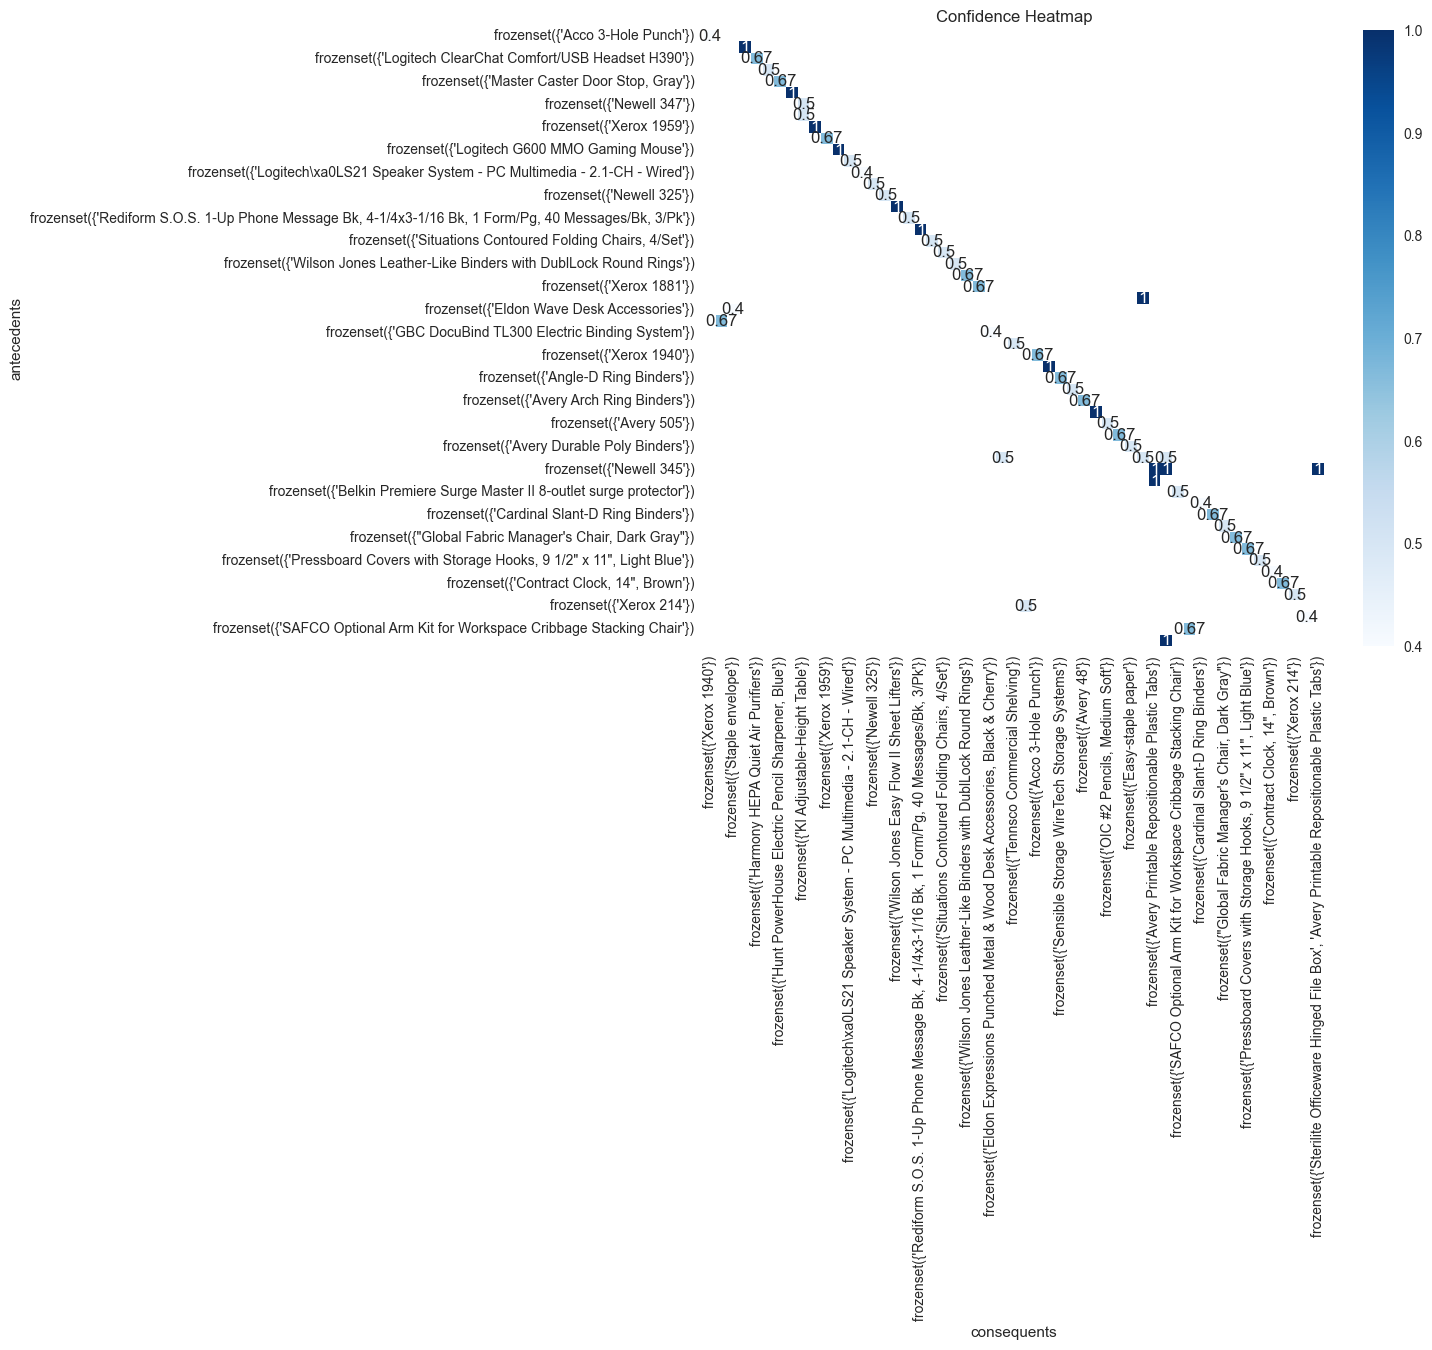

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot table 생성
pivot = rules.pivot("antecedents", "consequents", "confidence")
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, cmap="Blues")
plt.title("Confidence Heatmap")
plt.show()


In [12]:
# from pymining import seqmining

# # 데이터프레임 정렬 (시간 순서대로)
# data = data.sort_values('Order Date')

# # 각 고객별로 시간 순서대로 구매한 상품 리스트 생성
# grouped = data.groupby('Customer ID')['Product Name'].apply(list)

# # 시퀀스 데이터 생성
# sequences = grouped.tolist()

# # 빈발 시퀀스 도출 (min_support: 최소 지지도)
# frequent_seqs = seqmining.freq_seq_enum(sequences, min_support=2)

# # 결과 출력
# for seq in frequent_seqs:
#     print(seq)


In [13]:
# antecedents와 consequents를 문자열로 변환하여 새로운 컬럼에 저장
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

In [14]:
data_sub = data_tm[['Product Name','Sub-Category']]

In [15]:
merged_data = pd.merge(data_sub, rules, left_on='Product Name', right_on='antecedents')

In [16]:
merged_data['Sub-Categories_1'] = merged_data['Sub-Category']

In [17]:
merged_data = merged_data.drop(['Sub-Category','Product Name'],axis=1)

In [18]:
merged_data.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric', 'Sub-Categories_1'],
      dtype='object')

In [19]:
merged_data_cons = pd.merge(data_sub, merged_data, left_on='Product Name', right_on='consequents')

In [20]:
merged_data_cons.columns

Index(['Product Name', 'Sub-Category', 'antecedents', 'consequents',
       'antecedent support', 'consequent support', 'support', 'confidence',
       'lift', 'leverage', 'conviction', 'zhangs_metric', 'Sub-Categories_1'],
      dtype='object')

In [21]:
# 컬럼 순서 변경
new_order = ['Product Name', 'antecedents','Sub-Categories_1', 'consequents','Sub-Category',
       'antecedent support', 'consequent support', 'support', 'confidence',
       'lift', 'leverage', 'conviction', 'zhangs_metric' ]
merged_data_cons = merged_data_cons.reindex(columns=new_order)

In [22]:
merged_data_cons.head()

,Product Name,antecedents,Sub-Categories_1,consequents,Sub-Category,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,Wilson Jones Easy Flow II Sheet Lifters,OIC Stacking Trays,Furnishings,Wilson Jones Easy Flow II Sheet Lifters,Binders,0.002886,0.008658,0.002886,1.0,115.5,0.002861,inf,0.994211
1,Wilson Jones Easy Flow II Sheet Lifters,OIC Stacking Trays,Furnishings,Wilson Jones Easy Flow II Sheet Lifters,Binders,0.002886,0.008658,0.002886,1.0,115.5,0.002861,inf,0.994211
2,Wilson Jones Easy Flow II Sheet Lifters,OIC Stacking Trays,Furnishings,Wilson Jones Easy Flow II Sheet Lifters,Binders,0.002886,0.008658,0.002886,1.0,115.5,0.002861,inf,0.994211
3,Wilson Jones Easy Flow II Sheet Lifters,OIC Stacking Trays,Furnishings,Wilson Jones Easy Flow II Sheet Lifters,Binders,0.002886,0.008658,0.002886,1.0,115.5,0.002861,inf,0.994211
4,Wilson Jones Easy Flow II Sheet Lifters,OIC Stacking Trays,Furnishings,Wilson Jones Easy Flow II Sheet Lifters,Binders,0.002886,0.008658,0.002886,1.0,115.5,0.002861,inf,0.994211
